<a href="https://colab.research.google.com/github/achmadsahib/Capstone-/blob/Capstone2/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bengkod/ObesityDataSet.csv')

# EDA

In [ ]:
# Tampilkan 5 baris pertama
print("🟩 5 Baris Pertama Dataset:")
display(df.head())

# Tampilkan tipe data setiap kolom
print("\n🟩 Tipe Data Setiap Kolom:")
df.info()

# Tampilkan deskripsi statistik dasar (untuk semua kolom, termasuk kategorikal)
print("""
🟩 Deskripsi Statistik Menjelaskan:
- count: jumlah data tidak kosong (non-null)
- unique: jumlah kategori unik (khusus kolom kategorikal)
- top: kategori yang paling sering muncul
- freq: frekuensi kemunculan kategori paling umum
""")

display(df.describe(include='all'))


🟩 5 Baris Pertama Dataset:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II



🟩 Tipe Data Setiap Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                  

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


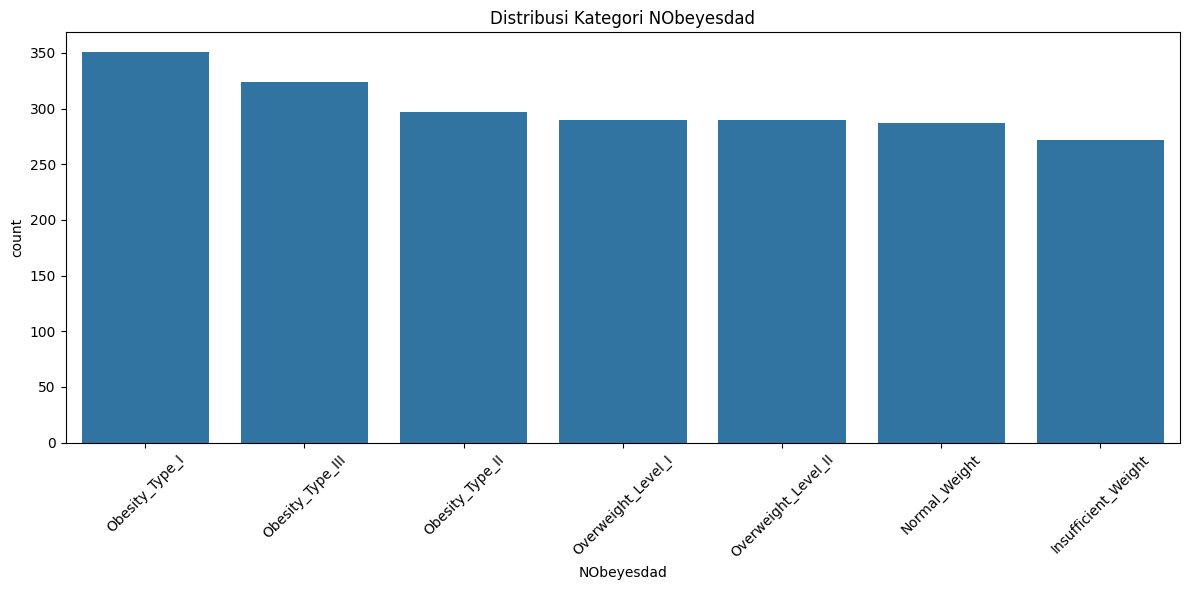

In [ ]:
# Visualisasi distribusi target (label obesitas)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kategori NObeyesdad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Cek jumlah missing values per kolom
print("Missing Values per Kolom:")
print(df.isnull().sum())

Missing Values per Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [ ]:
# Cek jumlah nilai unik tiap kolom
print("Jumlah Nilai Unik per Kolom:")
print(df.nunique())


Jumlah Nilai Unik per Kolom:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [ ]:
# Cek jumlah data duplikat
print("Jumlah Duplikat:")
print(df.duplicated().sum())


Jumlah Duplikat:
18


In [ ]:
# Cek distribusi kategori target
print("Distribusi Label Target:")
print(df['NObeyesdad'].value_counts())


Distribusi Label Target:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


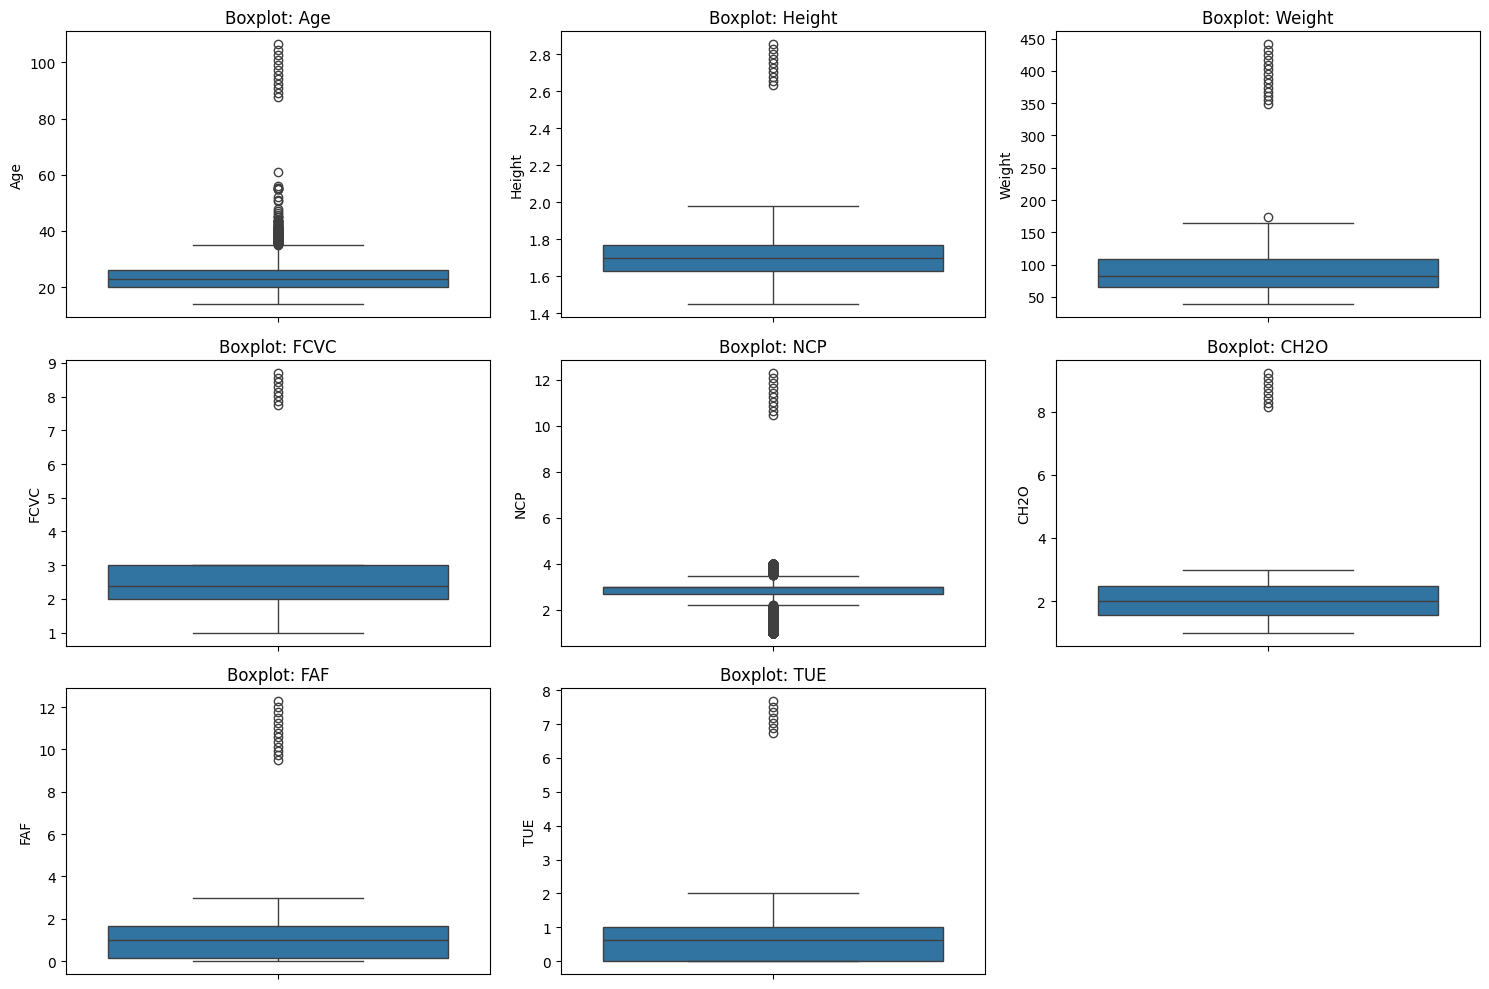

In [ ]:
# Konversi kolom numerik dari object ke float
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Tampilkan boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()



📌 Kesimpulan Sementara EDA:
- Dataset memiliki 2111 baris dan 17 kolom.
- Beberapa kolom numerik masih bertipe object, sudah dikonversi.
- Ada missing values yang perlu ditangani.
- Label target (NObeyesdad) tidak seimbang sempurna.
- Tidak ada data duplikat yang signifikan.
- Ditemukan outlier pada beberapa kolom numerik (contoh: Weight, Height, Age).



# Preprocessing

In [ ]:
# Konversi kolom numerik (ada yang disimpan sebagai object)
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Tangani missing values kategori dengan modus
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Hapus duplikasi
df = df.drop_duplicates()

# Hapus outlier dengan metode IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in num_cols:
    df = remove_outliers_iqr(df, col)

df.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding untuk semua kolom kategori
le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


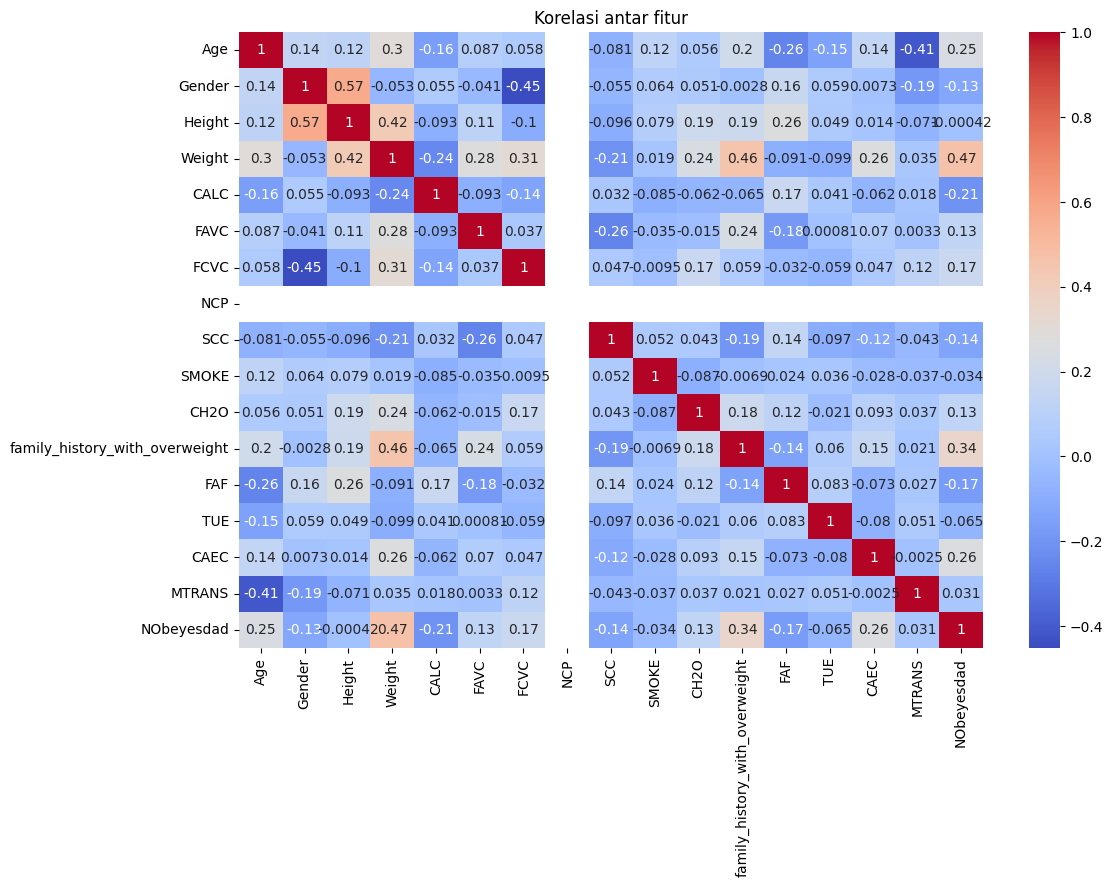

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap korelasi untuk melihat keterkaitan antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur')
plt.show()

# (Opsional) Anda bisa menghapus fitur dengan korelasi rendah terhadap target jika diperlukan.
# Misalnya:
# df = df.drop(['TUE'], axis=1)  # contoh jika ingin menghapus kolom


In [ ]:
from imblearn.over_sampling import SMOTE

# Pisahkan fitur dan label
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

print("Distribusi sebelum SMOTE:\n", y.value_counts())

# SMOTE untuk oversampling
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("\nDistribusi sesudah SMOTE:\n", pd.Series(y_resampled).value_counts())


Distribusi sebelum SMOTE:
 NObeyesdad
4    314
1    188
3    163
2    149
5     95
6     90
0     89
Name: count, dtype: int64

Distribusi sesudah SMOTE:
 NObeyesdad
1    314
5    314
2    314
6    314
3    314
0    314
4    314
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


✅ Kesimpulan Proses Preprocessing


* Dataset sudah bersih dari duplikasi, missing value, dan outlier.
* Semua fitur kategori sudah dikonversi ke angka.

*  Kelas target berhasil diseimbangkan.
*  Data sudah dinormalisasi dan siap untuk modeling (Machine Learning).








